## MNIST Handwritten Numerical Dataset Classification

In [38]:
#Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [34]:
#Importing the dataset to the mnist variable
mnist = tf.keras.datasets.mnist

In [35]:
#Unpacking and Loading the dataset to train and test variables
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing the dataset
x_train = x_train.reshape((-1,28,28,1)).astype('float32') / 255.0
x_test = x_test.reshape((-1,28,28,1)).astype('float32') / 255.0

In [37]:
# Function to convert the images to RGB format, with a depth of 3.
def to_rgb(x):
    x_rgb = np.zeros((x.shape[0], 28, 28, 3))
    for i in range(3):
        x_rgb[..., i] = x[..., 0]
    return x_rgb
x_train = to_rgb(x_train)
x_test = to_rgb(x_test)

In [44]:
# CNN model
model = keras.Sequential([tf.keras.Input(shape=(28,28,3)),
     Conv2D(16, 3, activation='relu'),
     MaxPooling2D(),                   
     Flatten(),
     Dense(10, activation='relu'),
     Dense(10, activation='softmax')])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                27050     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 27,608
Trainable params: 27,608
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])

In [46]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/5
750/750 [==============================] - 7s 9ms/step - loss: 0.3709 - accuracy: 0.8895 - val_loss: 0.1611 - val_accuracy: 0.9553
Epoch 2/5
750/750 [==============================] - 7s 9ms/step - loss: 0.1369 - accuracy: 0.9591 - val_loss: 0.1147 - val_accuracy: 0.9674
Epoch 3/5
750/750 [==============================] - 7s 9ms/step - loss: 0.0986 - accuracy: 0.9710 - val_loss: 0.0979 - val_accuracy: 0.9719
Epoch 4/5
750/750 [==============================] - 7s 9ms/step - loss: 0.0794 - accuracy: 0.9764 - val_loss: 0.0796 - val_accuracy: 0.9766
Epoch 5/5
750/750 [==============================] - 7s 9ms/step - loss: 0.0677 - accuracy: 0.9796 - val_loss: 0.0695 - val_accuracy: 0.9787


### XAI

In [47]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import random

  0%|          | 0/1000 [00:00<?, ?it/s]

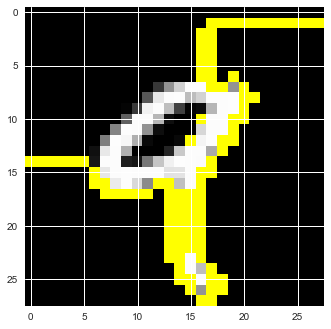

In [48]:
explainer = lime_image.LimeImageExplainer(random_state=100)
explanation = explainer.explain_instance(x_train[4], model.predict)
plt.imshow(x_train[4])
temp, mask = explanation.get_image_and_mask(model.predict(x_train[4].reshape((1,28,28,3))).argmax(axis=1)[0], positive_only=True, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

### Graphs

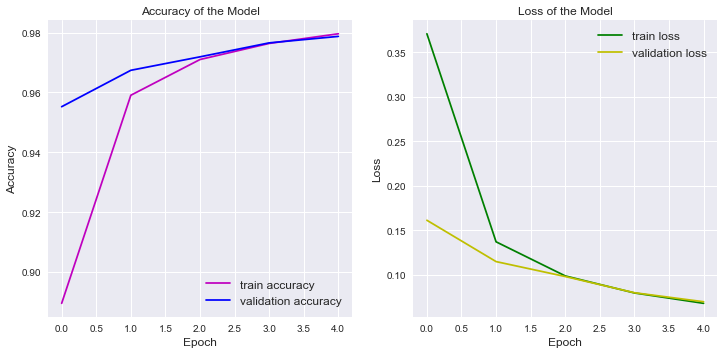

In [49]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'],'m')
plt.plot(history.history['val_accuracy'],'b')
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'],'g')
plt.plot(history.history['val_loss'],'y')
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

### Predictions

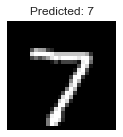

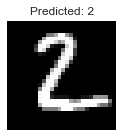

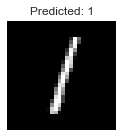

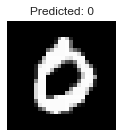

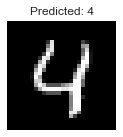

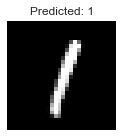

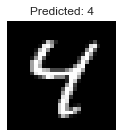

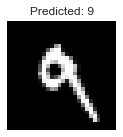

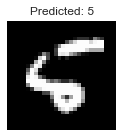

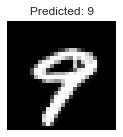

In [51]:
predictions = model.predict(x_test)
rp = np.argmax(predictions, axis=-1)
for i in range(10):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i], cmap='binary')
    plt.title("Predicted: " + str(rp[i]))
    plt.axis("off")
plt.show()

### Classification Report
* Various metrics like precision, recall, f1-score etc are displayed below. 

In [56]:
# Classification Report
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = ['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### Saving a Model (.h5 format)

In [11]:
import os.path
if os.path.isfile('C:/users/parit/models/MNSIT_data_handwritten_digits.h5') is False:
    model.save('C:/users/parit/models/MNSIT_data_handwritten_digits.h5')

#### Loading a saved model

In [12]:
from tensorflow.keras.models import load_model
new_model = load_model('C:/users/parit/models/MNSIT_data_handwritten_digits.h5')